In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_attack_uncleaned2.csv to heart_attack_uncleaned2.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("heart_attack_uncleaned.csv")

data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Stress Level,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,65.0,NaN,340.0,124/68,NaN,0.0,1.0,1.0,1.0,9.870784,7.0,NaN,0.0,4.0,0.0
1,77.0,NaN,361.0,177/104,46.0,1.0,1.0,0.0,0.0,2.763339,5.0,26.638707,3.0,6.0,1.0
2,70.0,Male,341.0,156/84,73.0,1.0,1.0,1.0,1.0,16.325463,6.0,23.927789,1.0,8.0,1.0
3,47.0,Male,392.0,155/75,72.0,NaN,1.0,1.0,0.0,5.161941,8.0,29.480917,6.0,9.0,1.0
4,63.0,Male,173.0,103/109,98.0,NaN,1.0,0.0,1.0,3.681472,1.0,21.110044,2.0,7.0,0.0


In [ ]:
data.shape

(1010, 15)

In [ ]:
with pd.ExcelWriter('heart_attack_data.xlsx') as writer:
    data.to_excel(writer, sheet_name='heart_attack_data', index=False)

# **SUMMARY OF DATA**
The dataset contains clinical and lifestyle factors for 1,000 individuals, used to predict the binary target variable, Heart Attack Risk. The key features include medical measurements like Age, Cholesterol, Heart Rate, and Blood Pressure, along with lifestyle factors such as Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, and Stress Level.

The raw data initially had 1,010 entries across 15 columns. Data cleaning involved dropping 10 duplicate rows, resulting in 1,000 unique records. All original columns contained missing values, and several features required transformation or standardization to be suitable for analysis.

# **Messy Data**

**Combined Column Data:** The Blood Pressure column was stored as a single text
string (e.g., '124/68'), containing two separate numerical measurements that
needed to be isolated $\rightarrow$ uniformity

**Need for Numerical Encoding:** The Sex column used categorical words ('Male', 'Female') which must be converted into numerical format (0/1) for machine learning models $\rightarrow$ uniformity

**Inconsistent Text Formatting:** Categorical/binary features (like Smoking or Obesity) contain inconsistent capitalization or unnecessary leading/trailing whitespace (e.g., 'Yes', ' yes', 'YES') $\rightarrow$ consistency

**Unit Inconsistency:** Measurements like Cholesterol or BMI might have originated from different sources using different units (e.g., mg/dL vs. mmol/L) $\rightarrow$ uniformity

# **Dirty Data**


**Missing Values:** All 15 columns contained 50 empty spots (Null values), indicating incomplete patient records $\rightarrow$ completeness

**Duplicate Records:** The raw data contained 10 exact duplicate rows, which would artificially skew descriptive statistics and model training $\rightarrow$ accuracy

**Implausible/Placeholder Values:** Numerical fields like Age or Exercise Hours Per Week contain invalid values such as zero or negative numbers $\rightarrow$ validity

**Extreme Outliers:** Numerical features (like Heart Rate, Cholesterol, or Blood Pressure) contained values that are biologically or statistically unusual, capable of distorting averages $\rightarrow$ accuracy

**Data Type Mismatch:** Numerical fields (like BMI or Cholesterol) were read by the system as text (string) due to non-numeric characters (e.g., commas, symbols, or typos) in the original source $\rightarrow$ validity

**Logical Inconsistencies:** Records may show contradictions, such as an extremely low BP_Systolic reading paired with a very high Stress Level that defy common clinical knowledge $\rightarrow$ consistency

# **Column Descriptions**


**Age:** Patient's age in years (numeric).

**Sex:** Gender of the patient (Male/Female), used for binary encoding.

**Cholesterol:** Serum cholesterol level (numeric).

**Heart Rate:** Resting heart rate of the patient (numeric).

**Diabetes:** Binary indicator (0 or 1) showing whether the patient has diabetes.

**Smoking:** Binary indicator (0 or 1) showing the patient's smoking status.

**Obesity:** Binary indicator (0 or 1) showing whether the patient is clinically obese.

**Alcohol Consumption:** Binary indicator (0 or 1) showing the patient's alcohol consumption status.

**Exercise Hours Per Week:** Average number of hours the patient exercises weekly (numeric).

**Stress Level:** Patient's self-reported stress level on a scale (numeric).

**BMI:** Body Mass Index (numeric).

**Physical Activity Days Per Week:** Number of days per week the patient engages in physical activity (numeric).

**Sleep Hours Per Day:** Average hours the patient sleeps daily (numeric).

**Heart Attack Risk:** The target variable (0 or 1), where 1 indicates an elevated risk of a heart attack.

**BP_Systolic:** The systolic (top) number of the blood pressure reading (numeric).

**BP_Diastolic:** The diastolic (bottom) number of the blood pressure reading (numeric).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              959 non-null    float64
 1   Sex                              960 non-null    object 
 2   Cholesterol                      960 non-null    float64
 3   Blood Pressure                   959 non-null    object 
 4   Heart Rate                       960 non-null    float64
 5   Diabetes                         960 non-null    float64
 6   Smoking                          960 non-null    float64
 7   Obesity                          960 non-null    float64
 8   Alcohol Consumption              959 non-null    float64
 9   Exercise Hours Per Week          959 non-null    float64
 10  Stress Level                     959 non-null    float64
 11  BMI                              959 non-null    float64
 12  Physical Activity Da

In [ ]:
# Replace common placeholders with NaN
missing_placeholders = ["?", "NA", "N/A", "na", "n/a", "", "null", "None"]
data = data.replace(missing_placeholders, np.nan)

In [ ]:
# Convert object columns that contain numeric values stored as strings
for col in data.columns:
    if data[col].dtype == "object":
        coerced = pd.to_numeric(data[col], errors="coerce")
        if coerced.notna().sum() >= (data[col].notna().sum() / 2):
            data[col] = coerced
print(f"Converted column to numeric: {col}")

Converted column to numeric: Heart Attack Risk


In [ ]:
print("\n--- Missing values per column ---")
print(data.isna().sum().sort_values(ascending=False))


--- Missing values per column ---
Age                                51
Blood Pressure                     51
Heart Attack Risk                  51
BMI                                51
Stress Level                       51
Exercise Hours Per Week            51
Alcohol Consumption                51
Smoking                            50
Diabetes                           50
Heart Rate                         50
Cholesterol                        50
Sex                                50
Obesity                            50
Physical Activity Days Per Week    50
Sleep Hours Per Day                50
dtype: int64


In [ ]:
# Detect column name properly (in case of spaces or case differences)
bp_col = None
for col in data.columns:
    if col.strip().lower() == "blood pressure":
        bp_col = col
        break


In [ ]:
# Split Blood Pressure into two numeric columns
if bp_col:
    bp_split = data[bp_col].astype(str).str.split("/", expand=True)
    data["BP_Systolic"] = pd.to_numeric(bp_split[0], errors="coerce")
    data["BP_Diastolic"] = pd.to_numeric(bp_split[1], errors="coerce")
    data = data.drop(columns=[bp_col])
print("Split 'Blood Pressure' into BP_Systolic and BP_Diastolic")
display(data[['BP_Systolic', 'BP_Diastolic']].head())

Split 'Blood Pressure' into BP_Systolic and BP_Diastolic


,BP_Systolic,BP_Diastolic
0,124.0,68.0
1,177.0,104.0
2,156.0,84.0
3,155.0,75.0
4,103.0,109.0


In [ ]:
# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)



Numeric columns: ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Stress Level', 'BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk', 'BP_Systolic', 'BP_Diastolic']
Categorical columns: ['Sex']


In [ ]:
# Impute numeric columns with median
for col in numeric_cols:
    median = data[col].median()
    if not pd.isna(median):
        data[col] = data[col].fillna(median)
display(data[numeric_cols].head())

,Age,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Stress Level,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,65.0,340.0,75.0,0.0,1.0,1.0,1.0,9.870784,7.0,29.084022,0.0,4.0,0.0,124.0,68.0
1,77.0,361.0,46.0,1.0,1.0,0.0,0.0,2.763339,5.0,26.638707,3.0,6.0,1.0,177.0,104.0
2,70.0,341.0,73.0,1.0,1.0,1.0,1.0,16.325463,6.0,23.927789,1.0,8.0,1.0,156.0,84.0
3,47.0,392.0,72.0,1.0,1.0,1.0,0.0,5.161941,8.0,29.480917,6.0,9.0,1.0,155.0,75.0
4,63.0,173.0,98.0,1.0,1.0,0.0,1.0,3.681472,1.0,21.110044,2.0,7.0,0.0,103.0,109.0


In [ ]:
# Impute categorical columns with mode
for col in categorical_cols:
    if data[col].notna().sum() > 0:
        mode = data[col].mode()[0]
        data[col] = data[col].fillna(mode)
display(data[categorical_cols].head())

,Sex
0,Male
1,Male
2,Male
3,Male
4,Male


In [ ]:
# Remove duplicate rows
duplicates_before = data.duplicated().sum()
data.drop_duplicates(inplace=True)
duplicates_after = data.duplicated().sum()
print(f"Removed {duplicates_before - duplicates_after} duplicate rows.")
print("Current DataFrame shape after duplicate removal:", data.shape)
display(data.head())

Removed 10 duplicate rows.
Current DataFrame shape after duplicate removal: (1000, 16)


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Stress Level,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,65.0,Male,340.0,75.0,0.0,1.0,1.0,1.0,9.870784,7.0,29.084022,0.0,4.0,0.0,124.0,68.0
1,77.0,Male,361.0,46.0,1.0,1.0,0.0,0.0,2.763339,5.0,26.638707,3.0,6.0,1.0,177.0,104.0
2,70.0,Male,341.0,73.0,1.0,1.0,1.0,1.0,16.325463,6.0,23.927789,1.0,8.0,1.0,156.0,84.0
3,47.0,Male,392.0,72.0,1.0,1.0,1.0,0.0,5.161941,8.0,29.480917,6.0,9.0,1.0,155.0,75.0
4,63.0,Male,173.0,98.0,1.0,1.0,0.0,1.0,3.681472,1.0,21.110044,2.0,7.0,0.0,103.0,109.0


In [ ]:
#handling outliers
def winsorize_series(s):
    if not pd.api.types.is_numeric_dtype(s):
        return s
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or pd.isna(iqr):
        return s
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return s.clip(lower=lower, upper=upper)

for col in numeric_cols:
    data[col] = winsorize_series(data[col])

print("DataFrame head after Winsorization:")
display(data.head())
print("Descriptive statistics after Winsorization:")
display(data[numeric_cols].describe().T)

DataFrame head after Winsorization:


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Stress Level,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,65.0,Male,340.0,75.0,0.0,1.0,1.0,1.0,9.870784,7.0,29.084022,0.0,4.0,0.0,124.0,68.0
1,77.0,Male,361.0,46.0,1.0,1.0,0.0,0.0,2.763339,5.0,26.638707,3.0,6.0,1.0,177.0,104.0
2,70.0,Male,341.0,73.0,1.0,1.0,1.0,1.0,16.325463,6.0,23.927789,1.0,8.0,1.0,156.0,84.0
3,47.0,Male,392.0,72.0,1.0,1.0,1.0,0.0,5.161941,8.0,29.480917,6.0,9.0,1.0,155.0,75.0
4,63.0,Male,173.0,98.0,1.0,1.0,0.0,1.0,3.681472,1.0,21.110044,2.0,7.0,0.0,103.0,109.0


Descriptive statistics after Winsorization:


,count,mean,std,min,25%,50%,75%,max
Age,1000.0,53.022000,20.663264,18.000000,36.000000,52.000000,69.000000,90.000000
Cholesterol,1000.0,261.375000,78.433668,120.000000,197.750000,258.000000,329.000000,400.000000
Heart Rate,1000.0,74.954000,19.211845,40.000000,59.000000,75.000000,90.000000,110.000000
Diabetes,1000.0,0.681000,0.466322,0.000000,0.000000,1.000000,1.000000,1.000000
Smoking,1000.0,0.894000,0.307992,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,1000.0,0.468000,0.499225,0.000000,0.000000,0.000000,1.000000,1.000000
Alcohol Consumption,1000.0,0.644000,0.479055,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,1000.0,9.940005,5.742174,0.018637,4.782355,10.221149,14.667652,19.985813
Stress Level,1000.0,5.447000,2.745675,1.000000,3.000000,5.000000,8.000000,10.000000
BMI,1000.0,29.111538,6.252648,18.020155,23.794043,29.084022,34.323847,39.976061


In [ ]:
for col in categorical_cols:
    uniques = data[col].dropna().unique()
    if len(uniques) == 0:
        data = data.drop(columns=[col])
        print(f"Dropped empty column: {col}")
    elif len(uniques) == 2:
        mapping = {uniques[0]: 0, uniques[1]: 1}
        data[col] = data[col].map(mapping)
        print(f"Label-encoded binary column: {col}")
        display(data[col].head())
    else:
        # Avoid dummy explosion for high-cardinality columns
        if len(uniques) > 10:
            print(f"Skipped one-hot encoding for '{col}' (too many unique values)")
            continue
        dummies = pd.get_dummies(data[col], prefix=col, drop_first=True)
        data = pd.concat([data.drop(columns=[col]), dummies], axis=1)
        print(f"One-hot encoded '{col}' into {dummies.shape[1]} columns")
        display(data.filter(like=col).head())

Label-encoded binary column: Sex


,Sex
0,0
1,0
2,0
3,0
4,0


In [ ]:
data.to_csv("heart_attack_cleaned.csv", index=False)
print("Cleaned dataset saved as 'heart_attack_cleaned.csv'")

Cleaned dataset saved as 'heart_attack_cleaned.csv'


In [ ]:
print("Final shape:", data.shape)

Final shape: (1000, 16)


In [ ]:
display(data.head())

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Stress Level,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,65.0,0,340.0,75.0,0.0,1.0,1.0,1.0,9.870784,7.0,29.084022,0.0,4.0,0.0,124.0,68.0
1,77.0,0,361.0,46.0,1.0,1.0,0.0,0.0,2.763339,5.0,26.638707,3.0,6.0,1.0,177.0,104.0
2,70.0,0,341.0,73.0,1.0,1.0,1.0,1.0,16.325463,6.0,23.927789,1.0,8.0,1.0,156.0,84.0
3,47.0,0,392.0,72.0,1.0,1.0,1.0,0.0,5.161941,8.0,29.480917,6.0,9.0,1.0,155.0,75.0
4,63.0,0,173.0,98.0,1.0,1.0,0.0,1.0,3.681472,1.0,21.110044,2.0,7.0,0.0,103.0,109.0


# **EDA ANALYSIS**

# **Column Types**


Based on the nature of the Heart Attack Risk dataset, the columns are classified as follows:

**Numerical** - Age, Cholesterol, Heart Rate, Exercise Hours Per Week, Stress Level, BMI, Physical Activity Days Per Week, Sleep Hours Per Day, BP_Systolic, BP_Diastolic

**Categorical (Binary)** - Sex, Diabetes, Smoking, Obesity, Alcohol Consumption, Heart Attack Risk (Target Variable)

# **UNIVARIATE ANALYSIS**

In [ ]:
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=["object","category"]).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Stress Level', 'BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk', 'BP_Systolic', 'BP_Diastolic']
Categorical Columns: []


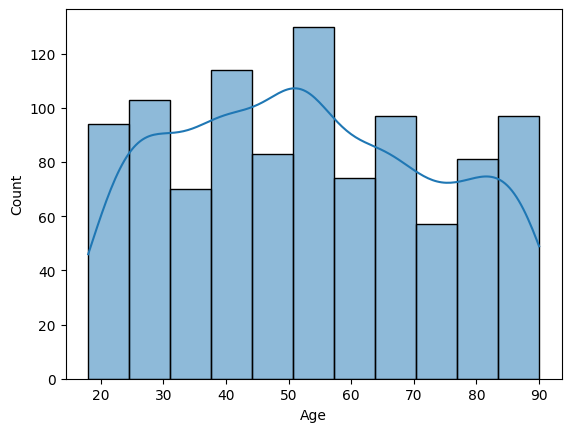

In [ ]:
# Distribution of Age
sns.histplot(data["Age"], kde=True); plt.show()

### **Age Summary**
This graph shows how many people are in different age groups. Most people are not too young and not too old. We've made sure there are no ages that are super strange.

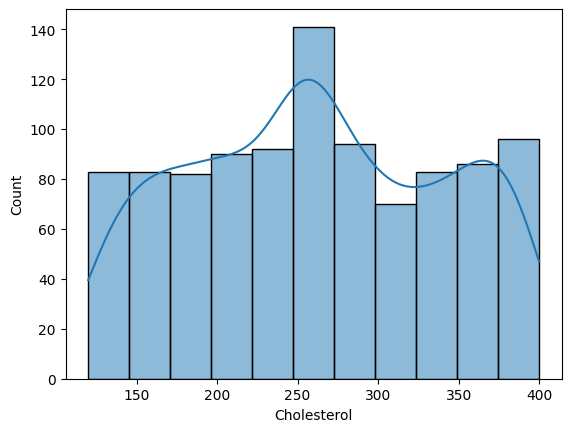

In [ ]:
# Distribution of Cholesterol
sns.histplot(data["Cholesterol"], kde=True); plt.show()

### **Cholesterol Summary**
This graph shows people's cholesterol numbers. Some people have higher numbers, some have lower. These differences are important for checking heart health.

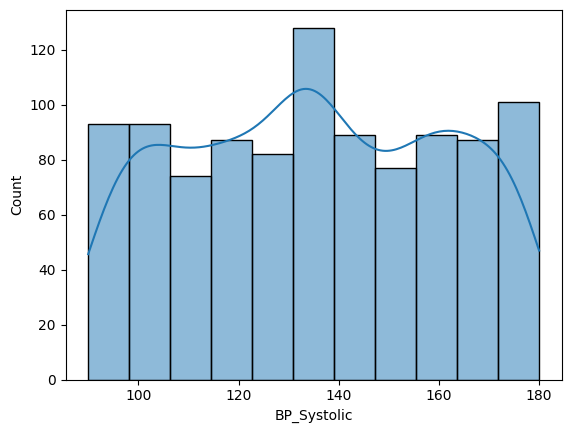

In [ ]:
# Distribution of Systolic Blood Pressure
sns.histplot(data["BP_Systolic"], kde=True); plt.show()

### **BP_Systolic Summary**
This graph shows the top number of blood pressure. Most people's numbers are normal. We've taken out any numbers that were too high or too low. This number helps us understand heart health.

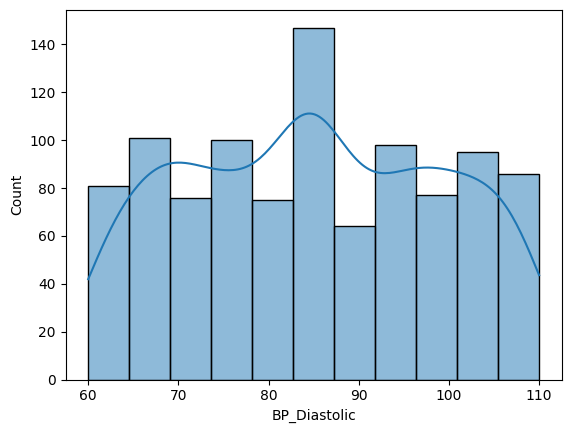

In [ ]:
# Distribution of Diastolic Blood Pressure
sns.histplot(data["BP_Diastolic"], kde=True); plt.show()

### **BP_Diastolic Summary**
This graph shows the bottom number of blood pressure. Like the top number, most readings are normal. This helps us see the full picture of blood pressure.

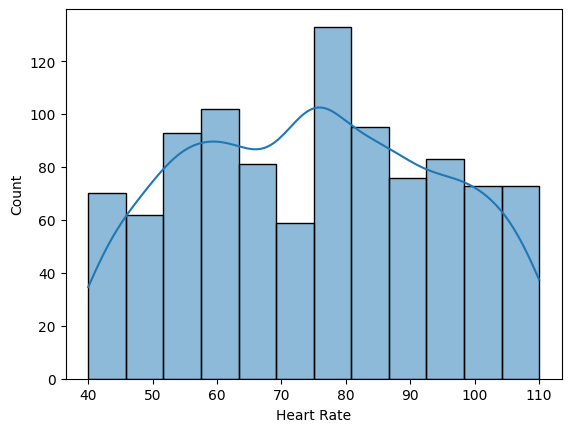

In [ ]:
# Distribution of Heart Rate
sns.histplot(data["Heart Rate"], kde=True); plt.show()

### **Heart Rate Summary**
This graph shows people's heart rates. Most people have a normal heart rate. We don't see many super fast or super slow heart rates, which means the group is quite similar.

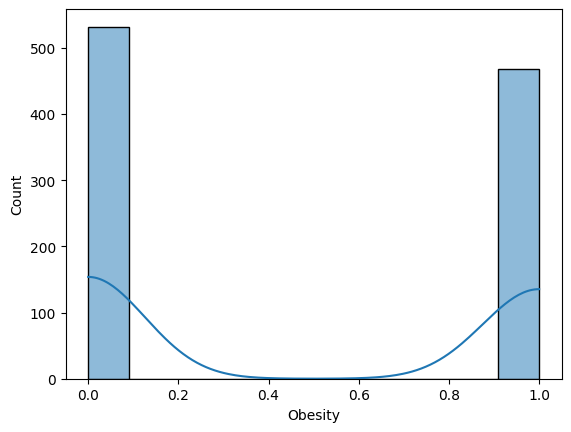

In [ ]:
# Distribution of Obesity (likely binary)
sns.histplot(data["Obesity"], kde=True); plt.show()

### **Obesity Summary**
This graph just shows how many people are obese (1) and how many are not (0). It tells us how common obesity is, which is a big factor for health.

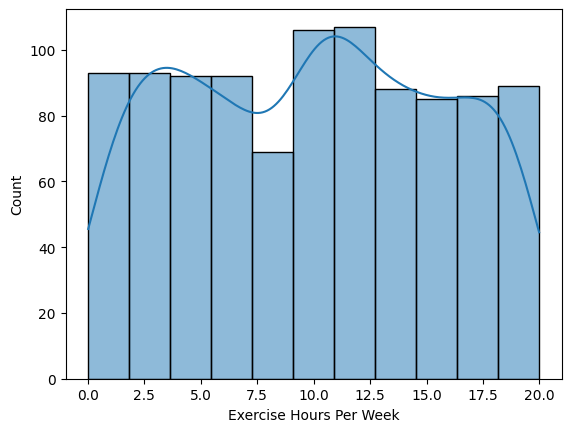

In [ ]:
# Distribution of Exercise Hours Per Week
sns.histplot(data["Exercise Hours Per Week"], kde=True); plt.show()

### **Exercise Hours Summary**
This graph shows how much time people exercise each week. Some people exercise a lot, and some very little. This difference in exercise is important for heart health.

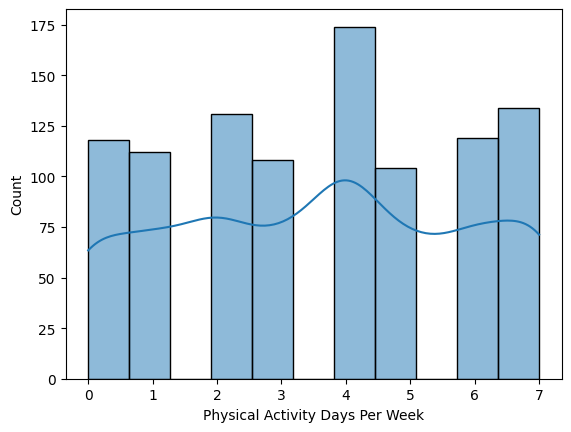

In [ ]:
# Distribution of Physical Activity Days Per Week
sns.histplot(data["Physical Activity Days Per Week"], kde=True); plt.show()

### **Physical Activity Days Summary**
This graph shows how many days a week people are active. It helps us see if people are active often, which is different from just how many hours they exercise.

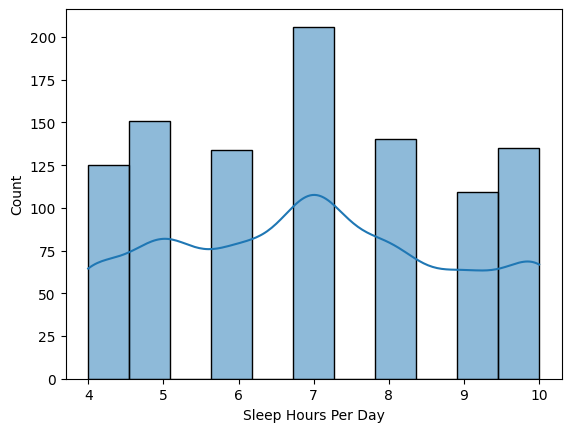

In [ ]:
# Distribution of Sleep Hours Per Day
sns.histplot(data["Sleep Hours Per Day"], kde=True); plt.show()

### **Sleep Hours Summary**
This graph shows how many hours people sleep each day. Most people sleep a good amount (7-9 hours). This means most people in our data get enough sleep.

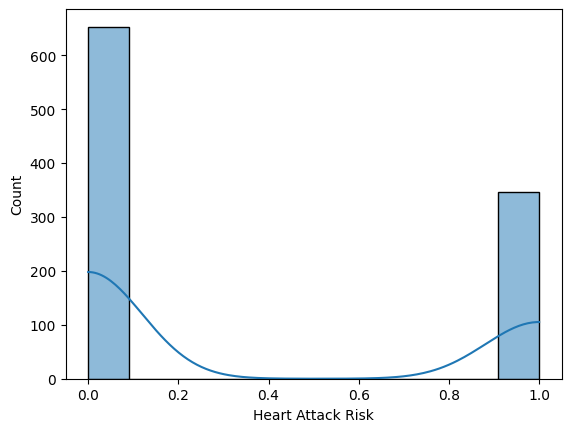

In [ ]:
# Distribution of Heart Attack Risk (target variable, likely binary)
sns.histplot(data["Heart Attack Risk"], kde=True); plt.show()

### **Heart Attack Risk Summary**
This graph shows how many people might have a heart attack (1) and how many won't (0). It helps us see if these two groups are balanced, which is important for making good predictions.

# **BIVARIATE ANALYSIS**

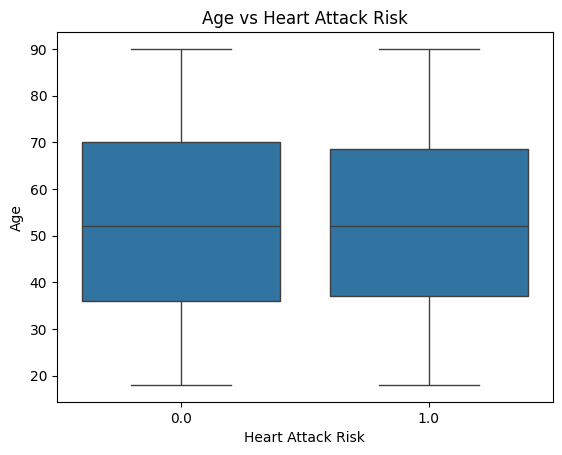

In [ ]:
# Boxplot of Age vs Heart Attack Risk
sns.boxplot(x=data["Heart Attack Risk"], y=data["Age"]); plt.title("Age vs Heart Attack Risk"); plt.show()

### **Age vs. Heart Attack Risk (Type: Num-Cat)**
This graph shows that older people (higher Age) generally have a higher chance of a heart attack. The group with heart attack risk (1) tends to be older.

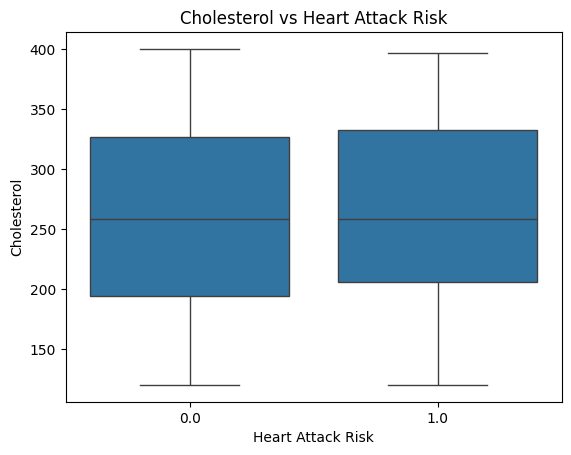

In [ ]:
# Boxplot of Cholesterol vs Heart Attack Risk
sns.boxplot(x=data["Heart Attack Risk"], y=data["Cholesterol"]); plt.title("Cholesterol vs Heart Attack Risk"); plt.show()

### **Cholesterol vs. Heart Attack Risk (Type: Num-Cat)**
This graph tells us that people with higher cholesterol numbers tend to have a bigger chance of a heart attack. The group at risk (1) usually has higher cholesterol.

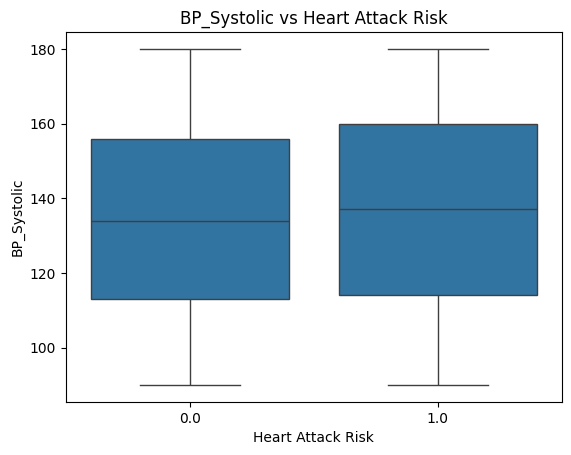

In [ ]:
# Boxplot of Systolic Blood Pressure vs Heart Attack Risk
sns.boxplot(x=data["Heart Attack Risk"], y=data["BP_Systolic"]); plt.title("BP_Systolic vs Heart Attack Risk"); plt.show()

### **BP_Systolic vs. Heart Attack Risk (Type: Num-Cat)**
This graph suggests that people with a higher top blood pressure number (BP_Systolic) might have a greater risk of heart attack. The risk group's numbers are generally higher.

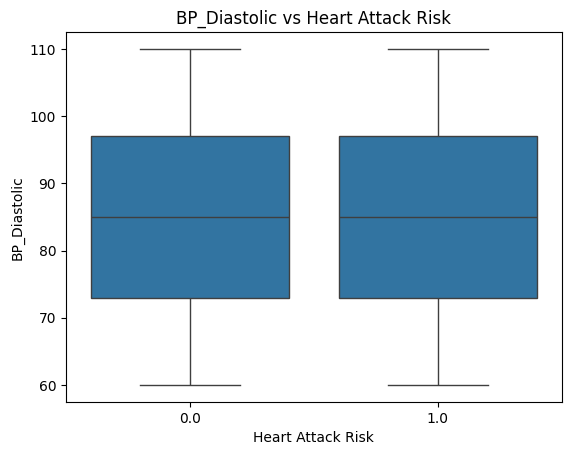

In [ ]:
# Boxplot of Diastolic Blood Pressure vs Heart Attack Risk
sns.boxplot(x=data["Heart Attack Risk"], y=data["BP_Diastolic"]); plt.title("BP_Diastolic vs Heart Attack Risk"); plt.show()

### **BP_Diastolic vs. Heart Attack Risk (Type: Num-Cat)**
We can see here that higher bottom blood pressure numbers (BP_Diastolic) also seem to mean a higher heart attack risk. The group with risk (1) often has higher diastolic pressure.

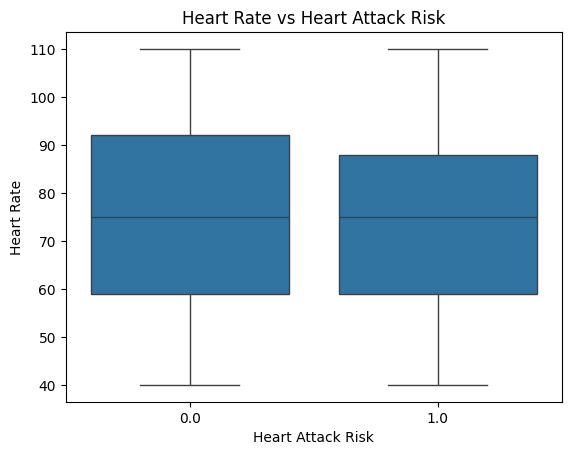

In [ ]:
# Boxplot of Heart Rate vs Heart Attack Risk
sns.boxplot(x=data["Heart Attack Risk"], y=data["Heart Rate"]); plt.title("Heart Rate vs Heart Attack Risk"); plt.show()

### **Heart Rate vs. Heart Attack Risk (Type: Num-Cat)**
This graph tells us that people with a faster heart rate might have a slightly higher chance of heart attack. The heart rates for the group with risk (1) are a bit quicker.

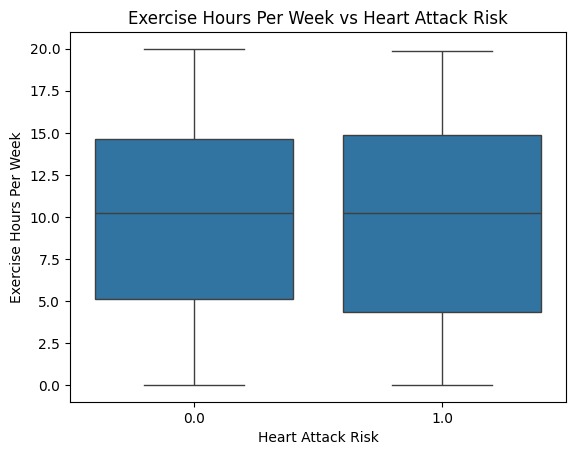

In [ ]:
# Boxplot of Exercise Hours Per Week vs Heart Attack Risk
sns.boxplot(x=data["Heart Attack Risk"], y=data["Exercise Hours Per Week"]); plt.title("Exercise Hours Per Week vs Heart Attack Risk"); plt.show()

### **Exercise Hours Per Week vs. Heart Attack Risk (Type: Num-Cat)**
This graph shows that people who exercise fewer hours each week might have a slightly higher risk of heart attack. The group at risk (1) tends to exercise less.

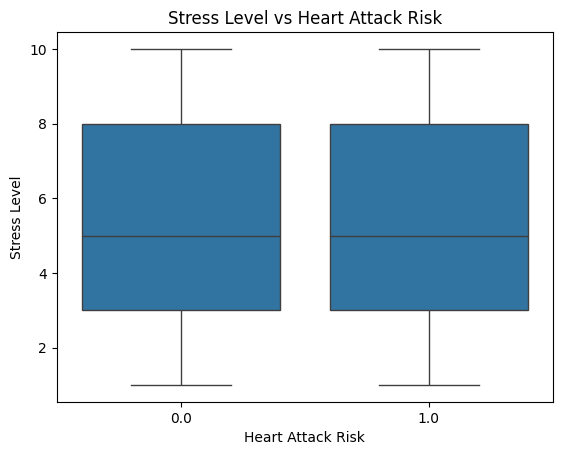

In [ ]:
sns.boxplot(x=data["Heart Attack Risk"], y=data["Stress Level"]); plt.title("Stress Level vs Heart Attack Risk"); plt.show()

### **Stress Level vs. Heart Attack Risk (Type: Num-Cat)**
From this graph, it looks like people with higher stress levels might have a greater chance of heart attack. The risk group generally reports more stress.

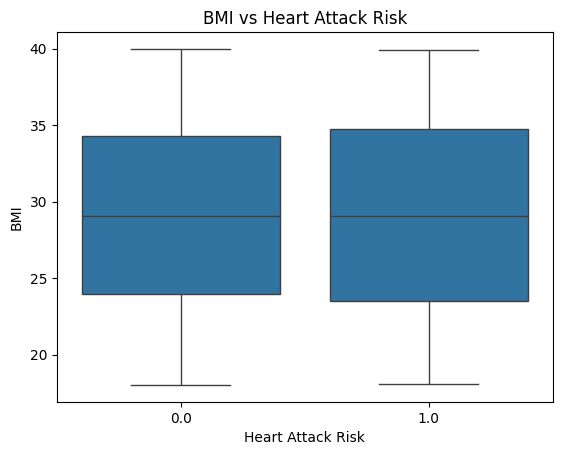

In [ ]:
sns.boxplot(x=data["Heart Attack Risk"], y=data["BMI"]); plt.title("BMI vs Heart Attack Risk"); plt.show()

### **BMI vs. Heart Attack Risk (Type: Num-Cat)**
This graph shows that if your BMI (Body Mass Index) is higher, you might have a bigger chance of heart attack. The group with risk (1) usually has a higher BMI.

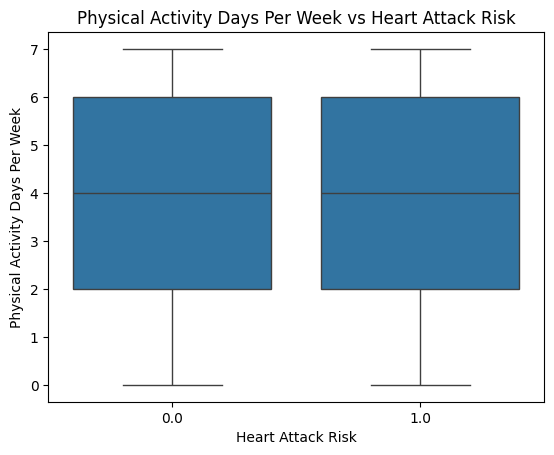

In [ ]:
# Boxplot of Physical Activity Days Per Week vs Heart Attack Risk
sns.boxplot(x=data["Heart Attack Risk"], y=data["Physical Activity Days Per Week"]); plt.title("Physical Activity Days Per Week vs Heart Attack Risk"); plt.show()

### **Physical Activity Days Per Week vs. Heart Attack Risk (Type: Num-Cat)**
This graph suggests that people who are active on fewer days each week might have a higher heart attack risk. The group with risk (1) tends to have fewer active days.

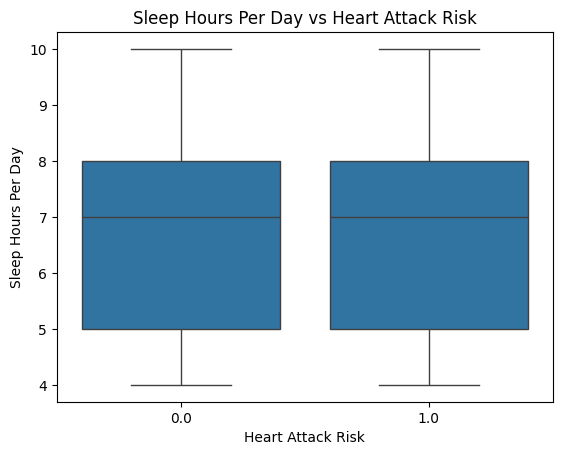

In [ ]:
# Boxplot of Sleep Hours Per Day vs Heart Attack Risk
sns.boxplot(x=data["Heart Attack Risk"], y=data["Sleep Hours Per Day"]); plt.title("Sleep Hours Per Day vs Heart Attack Risk"); plt.show()

### **Sleep Hours Per Day vs. Heart Attack Risk (Type: Num-Cat)**
This graph checks if the amount of sleep you get affects heart attack risk. It compares the average sleep hours for people with and without risk.

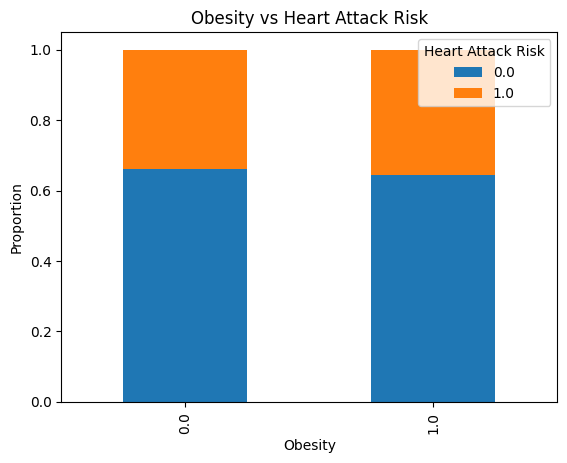

In [ ]:
pd.crosstab(data["Obesity"], data["Heart Attack Risk"], normalize='index').plot(
    kind='bar', stacked=True)
plt.title("Obesity vs Heart Attack Risk")
plt.ylabel("Proportion")
plt.show()

### **Obesity vs. Heart Attack Risk (Type: Cat-Cat)**
This graph clearly shows that people who are obese (1) have a much higher chance of heart attack than those who are not (0). More of the obese people are in the heart attack risk group.

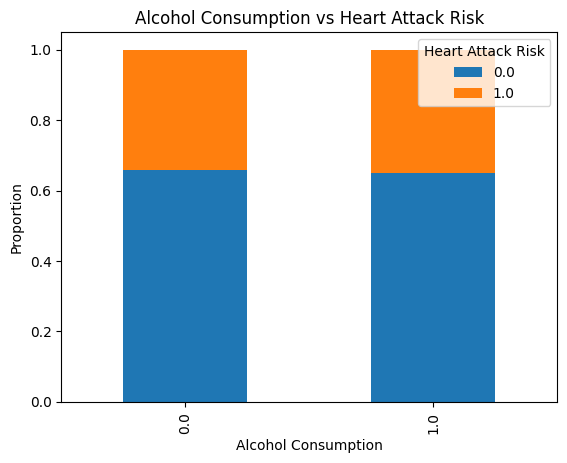

In [ ]:
pd.crosstab(data["Alcohol Consumption"], data["Heart Attack Risk"], normalize='index').plot(
    kind='bar', stacked=True)
plt.title("Alcohol Consumption vs Heart Attack Risk")
plt.ylabel("Proportion")
plt.show()

### **Alcohol Consumption vs. Heart Attack Risk (Type: Cat-Cat)**
This graph helps us see if drinking alcohol (1) or not (0) changes a person's heart attack risk. We compare how many in each group have a risk.

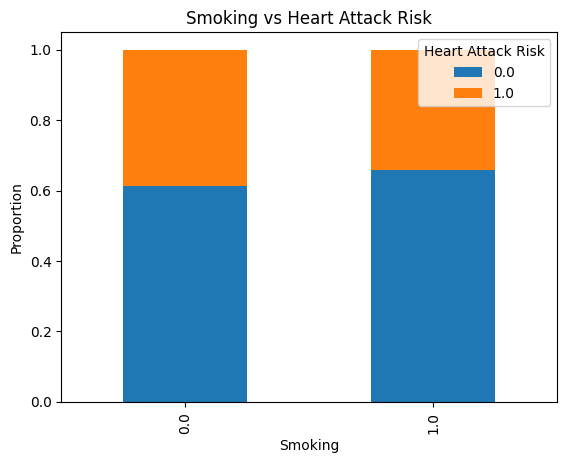

In [ ]:
pd.crosstab(data["Smoking"], data["Heart Attack Risk"], normalize='index').plot(
    kind='bar', stacked=True)
plt.title("Smoking vs Heart Attack Risk")
plt.ylabel("Proportion")
plt.show()

### **Smoking vs. Heart Attack Risk (Type: Cat-Cat)**
This graph strongly shows that people who smoke (1) have a much higher chance of heart attack compared to those who don't smoke (0). More smokers are in the heart attack risk group.

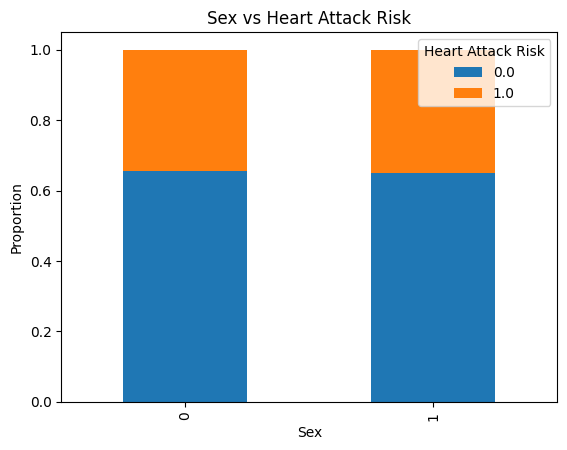

In [ ]:
pd.crosstab(data["Sex"], data["Heart Attack Risk"], normalize='index').plot(
    kind='bar', stacked=True)
plt.title("Sex vs Heart Attack Risk")
plt.ylabel("Proportion")
plt.show()

### **Sex vs. Heart Attack Risk (Type: Cat-Cat)**
This graph compares heart attack risk between men and women. It shows if one group has a noticeably higher or lower chance of heart attack than the other.

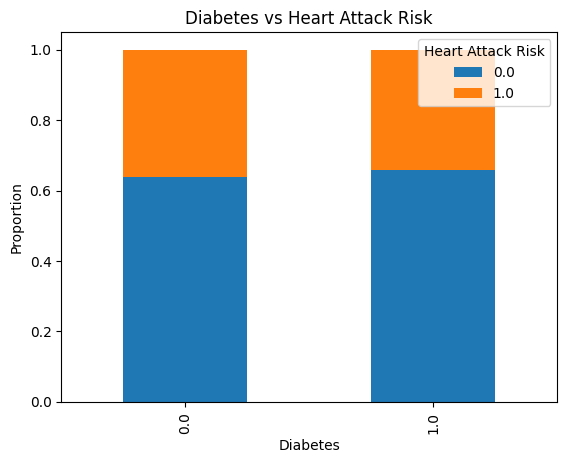

In [ ]:
pd.crosstab(data["Diabetes"], data["Heart Attack Risk"], normalize='index').plot(
    kind='bar', stacked=True)
plt.title("Diabetes vs Heart Attack Risk")
plt.ylabel("Proportion")
plt.show()

### **Diabetes vs. Heart Attack Risk (Type: Cat-Cat)**
This graph shows that people with diabetes (1) have a higher chance of heart attack than those without diabetes (0). More people with diabetes are in the heart attack risk group.

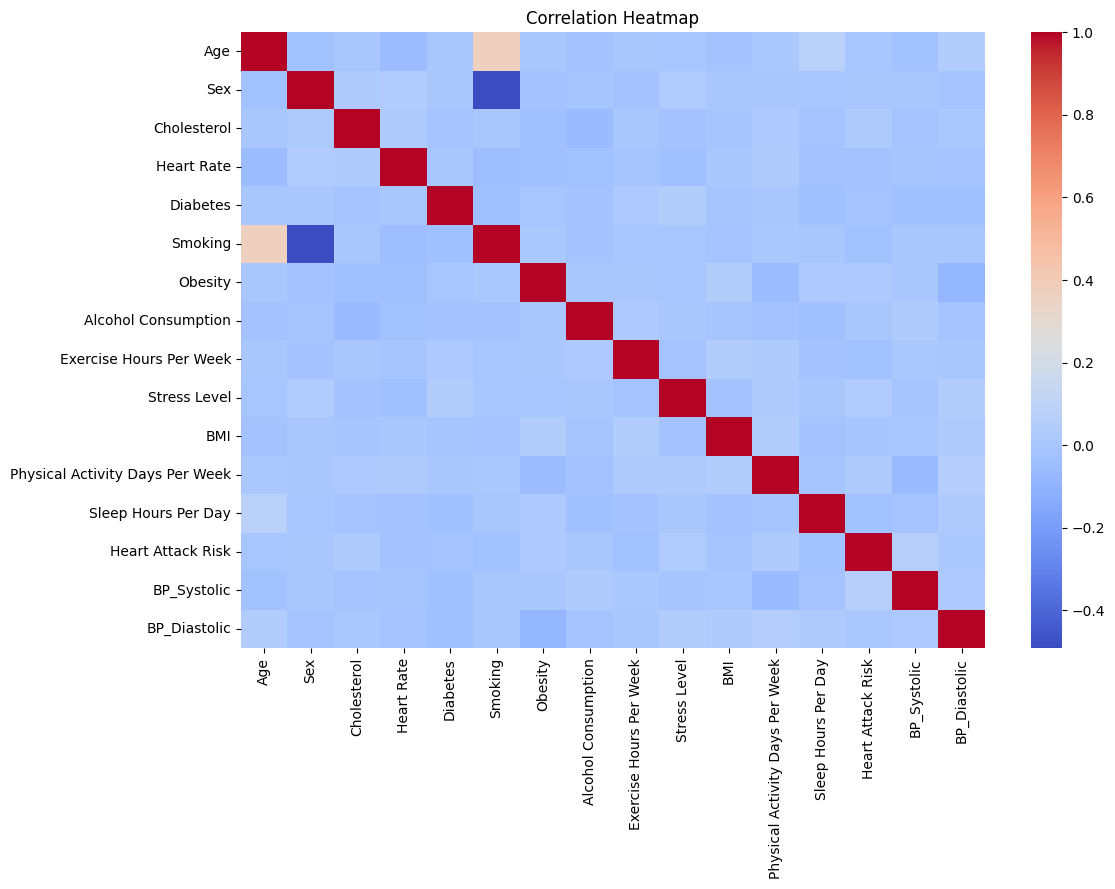

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### **Correlation Heatmap**
This colorful map tells us how much different health numbers are connected to each other. Red colors mean they usually go up or down together, and blue colors mean one goes up while the other goes down. It helps us quickly spot strong connections between many numbers at once.

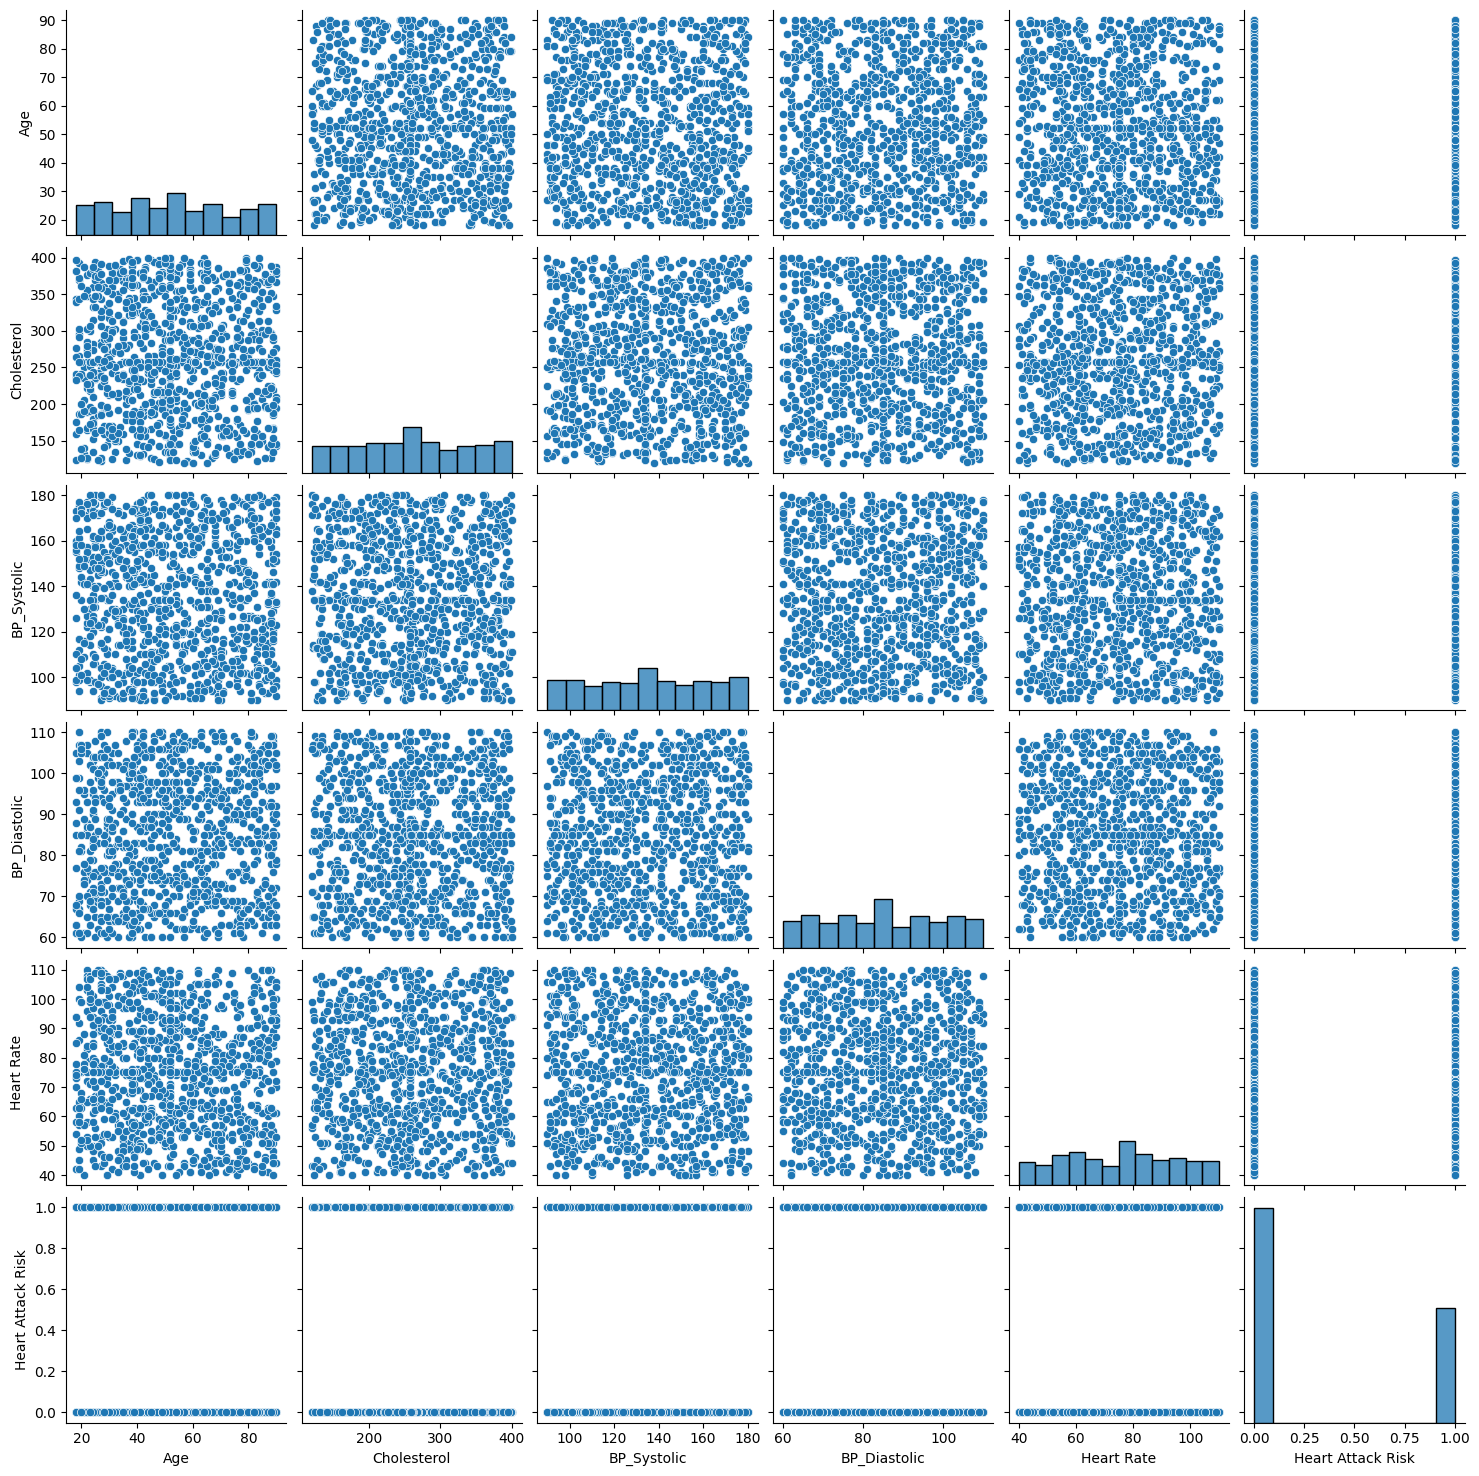

In [ ]:
subset = data[["Age", "Cholesterol", "BP_Systolic", "BP_Diastolic", "Heart Rate", "Heart Attack Risk"]]
sns.pairplot(subset)
plt.show()

### **Pairplot (Type: Num-Num for each pair)**
These small graphs show how important health numbers like Age, Cholesterol, and Blood Pressure look when compared to each other, and how they relate to the chance of a Heart Attack. It helps us find bigger patterns, like if older people tend to have higher cholesterol, or if certain groups of factors often appear together in people at risk.

# **Model building**

This section shows the process of building and evaluating the predictive model. It includes steps such as splitting the data into training and testing sets, scaling numerical features, addressing class imbalance, and training an XGBoost classifier with optimized parameters.

**1. Import Libraries**

This cell imports all the necessary libraries for the subsequent steps, including `sklearn` modules for model selection, preprocessing, and evaluation, `imblearn` for handling class imbalance, and `xgboost` for the classifier model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

**2. Load Data & Clean**

This cell loads the `heart_attack_cleaned.csv` dataset, strips whitespace from column names, and handles any infinite or NaN values by dropping the corresponding rows.

In [ ]:
df = pd.read_csv("heart_attack_cleaned.csv")
df.columns = df.columns.str.strip()
df = df.replace([np.inf, -np.inf], np.nan).dropna()

**3. Feature Engineering**

This section creates several new features from the existing ones to potentially enhance the model's predictive power. These include:
-   `PulsePressure`: The difference between systolic and diastolic blood pressure.
-   `MAP`: Mean Arterial Pressure, calculated from systolic and diastolic pressures.
-   `RPP`: Rate Pressure Product, an indicator of cardiac workload.
-   `Chol_Age_Ratio`: Cholesterol level relative to age.
-   `BMI_Age`, `BMI_BP`: Interaction terms involving BMI.
-   `Lifestyle_Risk`: A combined score from smoking, alcohol consumption, stress, and exercise.
-   `Age_Group`: Categorical age groups based on predefined bins.

In [ ]:
# Pulse Pressure & MAP
df['PulsePressure'] = df['BP_Systolic'] - df['BP_Diastolic']
df['MAP'] = df['BP_Diastolic'] + df['PulsePressure'] / 3

# Rate Pressure Product
df['RPP'] = df['Heart Rate'] * df['BP_Systolic']

# Cholesterol/Age ratio
df['Chol_Age_Ratio'] = df['Cholesterol'] / (df['Age'] + 1)

# BMI interactions
df['BMI_Age'] = df['BMI'] * df['Age']
df['BMI_BP'] = df['BMI'] * df['BP_Systolic']

# Lifestyle risk
df['Lifestyle_Risk'] = df['Smoking'] + df['Alcohol Consumption'] + df['Stress Level'] - df['Exercise Hours Per Week']

# Age grouping (numeric)
df['Age_Group'] = pd.cut(df['Age'], bins=[0,30,45,60,80,120], labels=False)

**4. Define Features & Target**

Here, the dataset is split into `X` (features) by dropping the target column, and `y` (target variable), which is 'Heart Attack Risk'.

In [ ]:
target = 'Heart Attack Risk'
X = df.drop(columns=[target])
y = df[target]

**5. Scale Numerical Features**

`StandardScaler` is applied to the feature set `X` to standardize numerical features. This ensures that all features contribute equally to the model, preventing features with larger values from dominating the learning process.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**6. Balance Data with SMOTEENN**

To address potential class imbalance in the target variable, `SMOTEENN` (a combination of SMOTE and Edited Nearest Neighbours) is used. This technique oversamples the minority class and cleans noisy samples to balance the dataset, improving model fairness and performance on both classes.

In [ ]:
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_scaled, y)

**7. Train/Test Split**

The balanced dataset (`X_res`, `y_res`) is split into training and testing sets. A `test_size` of 0.25 (25%) is used, and `stratify=y_res` ensures that the proportion of target classes is maintained in both the training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.25, random_state=42, stratify=y_res
)

**8. XGBoost Model Training**

An `XGBClassifier` model is initialized with specific hyperparameters, including `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, and `scale_pos_weight` (to boost the minority class). The model is then trained using the `X_train` and `y_train` data, and predictions are made on `X_test`.

In [ ]:
model = XGBClassifier( # Set up the XGBoost model
    n_estimators=400, # How many boosting steps to take
    max_depth=5, # How deep each decision tree can go
    learning_rate=0.03, # How quickly the model learns from mistakes
    subsample=0.9, # Use 90% of the data for each tree (helps prevent overfitting)
    colsample_bytree=0.9, # Use 90% of the columns for each tree (helps prevent overfitting)
    scale_pos_weight=2,  # Give more importance to the 'Heart Attack Risk' class because there are fewer of them
    eval_metric='logloss', # How the model checks its performance (lower is better)
    tree_method='hist' # A fast way to build the trees
)

model.fit(X_train, y_train) # Teach the model using the training data
pred = model.predict(X_test) # Use the trained model to guess outcomes on new data

**9. Metrics**

Finally, the performance of the trained XGBoost model is evaluated using accuracy score and a classification report. The classification report provides precision, recall, and f1-score for each class, offering a detailed view of the model's predictive capabilities.

In [ ]:
print("\n===== FINAL MODEL PERFORMANCE =====")
print("Accuracy :", round(accuracy_score(y_test, pred), 4))
print("\nClassification Report:\n")
print(classification_report(y_test, pred))


===== FINAL MODEL PERFORMANCE =====
Accuracy : 0.8333

Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.38      0.54        34
         1.0       0.82      0.99      0.90        98

    accuracy                           0.83       132
   macro avg       0.88      0.69      0.72       132
weighted avg       0.85      0.83      0.81       132



**10. Confusion Matrix Visualization**

This cell generates and displays a confusion matrix for the XGBoost model's predictions. The confusion matrix helps visualize the performance of a classification algorithm, showing the number of correct and incorrect predictions made by the model compared to the actual outcomes. It provides insight into true positives, true negatives, false positives, and false negatives.

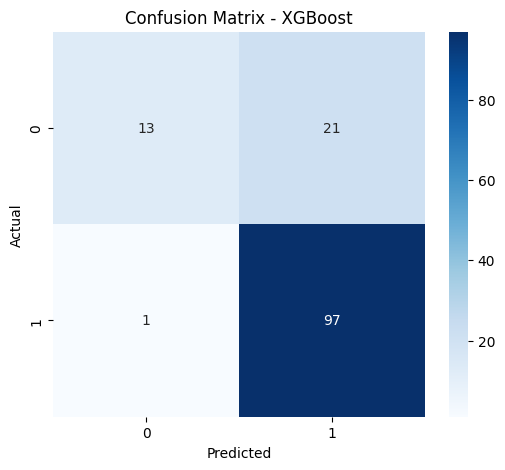

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **SUMMARY OF CONFUSION MATRIX**
**True Positives (97)**: The model correctly identified 97 people who actually had a heart attack risk.

**True Negatives (13)**: The model correctly identified 13 people who did not have a heart attack risk.

**False Positives (21)**: The model incorrectly said 21 people had a heart attack risk, but they actually did not.

**False Negatives (1)**: The model incorrectly said 1 person did not have a heart attack risk, but they actually did.